# Wine Quality Prediction Model

## Data Importation and Inspection

In [1]:
import pandas as pd

# Load the dataset
wine = pd.read_csv('WineQT.csv')

In [2]:
# Displaying basic information about the dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


##### Structure:

###### Rows: 1143
###### Columns: 13

In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

###### No Missing Values

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


##### Dataset Insights:
###### Key predictors include: fixed acidity, volatile acidity, citric acid, density, pH, sulphates, and alcohol.

##### Feature Statistics:

##### Features like density, pH, and alcohol seem to have a manageable range of values.
###### quality scores range between 3 and 8.
##### Outliers:

###### chlorides and residual sugar show large deviations in maximum values, which might indicate outliers.

## Data Visualizations

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'Id' column as it is irrelevant for predictions
wine = wine.drop(columns=['Id'])

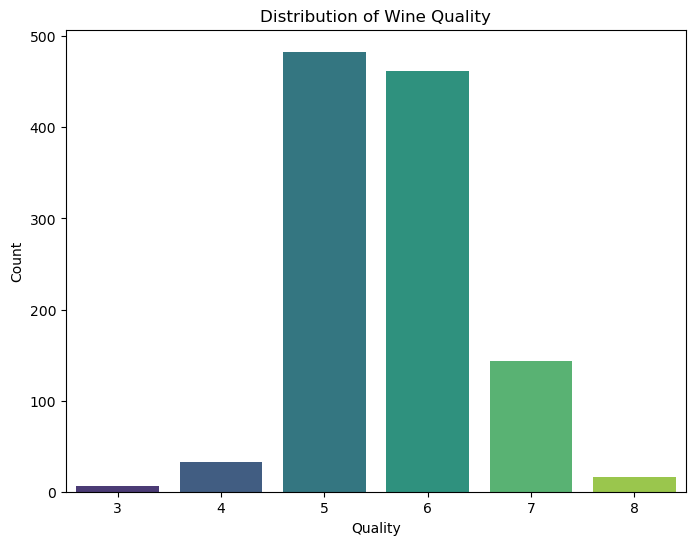

In [7]:
# Visualizing the distribution of wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

##### The quality scores are primarily concentrated between 5 and 6, with fewer examples at the extremes (3 and 8).

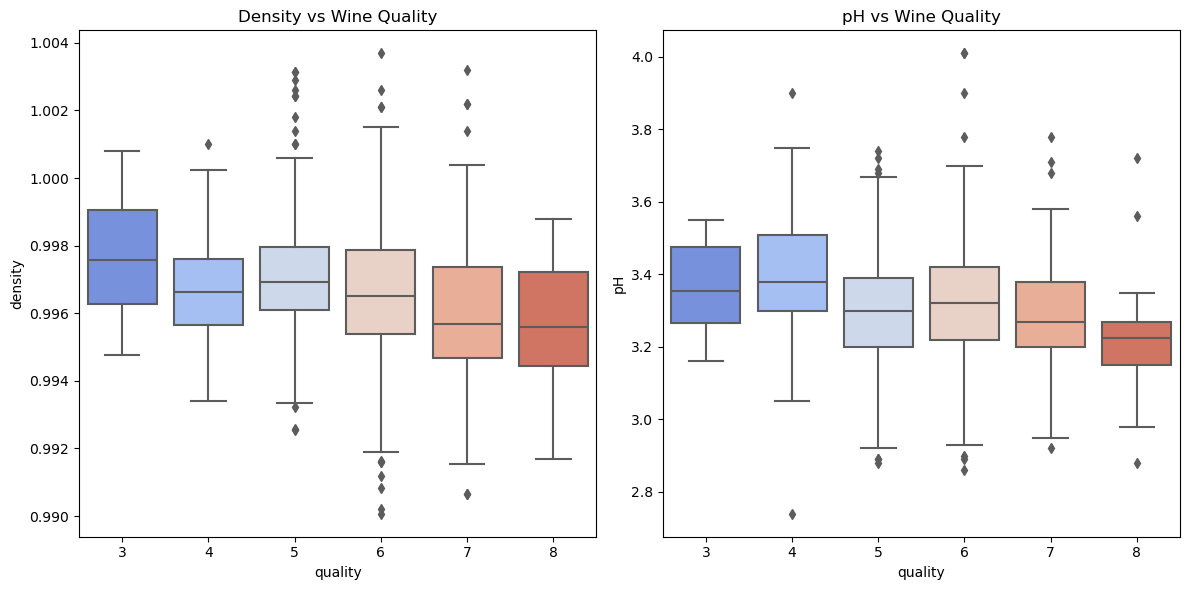

In [8]:
# Exploring relationships with density and pH
plt.figure(figsize=(12, 6))

# Density vs Quality
plt.subplot(1, 2, 1)
sns.boxplot(x='quality', y='density', data=wine, palette='coolwarm')
plt.title('Density vs Wine Quality')

# pH vs Quality
plt.subplot(1, 2, 2)
sns.boxplot(x='quality', y='pH', data=wine, palette='coolwarm')
plt.title('pH vs Wine Quality')

plt.tight_layout()
plt.show()

#### Density and Quality:

##### Density shows a relatively consistent distribution across quality levels, with minor variations suggesting it might provide moderate predictive power.
#### pH and Quality:

##### pH appears relatively uniform across quality scores but shows slight clustering for middle-quality wines (5 and 6).

## Correlation matrix

In [9]:
# Compute the correlation matrix
correlation_matrix = wine.corr()

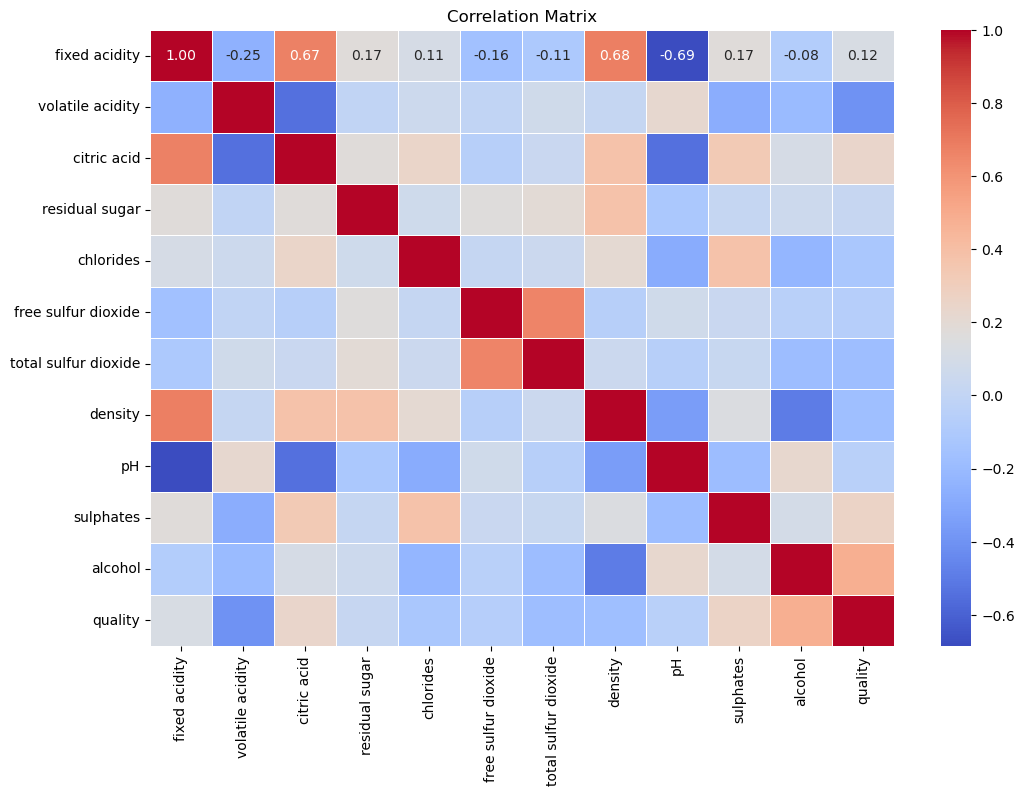

In [10]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Highlight the correlations of features with quality
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
quality_correlation

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

#### Strongest Positive Correlations:

##### alcohol (0.48): Most positively correlated with wine quality, making it a key predictor.
##### sulphates (0.26) and citric acid (0.24) also show moderate positive correlations.
#### Negative Correlations:

##### volatile acidity (−0.41) and density (−0.18) have significant negative correlations with quality, indicating their importance in the opposite direction.
#### Weak Correlations:

##### Features like residual sugar and pH have near-zero correlations, indicating limited predictive power for quality.

## Feature Selection

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features with notable correlation to quality (threshold > |0.1|)
features = ['alcohol', 'sulphates', 'citric acid', 'fixed acidity', 
            'volatile acidity', 'density', 'chlorides', 'total sulfur dioxide']

X = wine[features]
y = wine['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Confirm split sizes
split_sizes = {
    "Training Set Size": X_train.shape,
    "Test Set Size": X_test.shape,
}
split_sizes

{'Training Set Size': (914, 8), 'Test Set Size': (229, 8)}

##### The dataset has been successfully split:

##### - Training set: 914 samples (80% of the data).
##### - Test set: 229 samples (20% of the data).
##### - Features selected: alcohol, sulphates, citric acid, volatile acidity, fixed acidity, chlorides, total sulfur dioxide, and density.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initializing the models
rf_model = RandomForestClassifier(random_state=42)
sgd_model = SGDClassifier(random_state=42)
svc_model = SVC(random_state=42)

# Training the models
rf_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
sgd_predictions = sgd_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
svc_accuracy = accuracy_score(y_test, svc_predictions)

rf_report = classification_report(y_test, rf_predictions, zero_division=0)
sgd_report = classification_report(y_test, sgd_predictions, zero_division=0)
svc_report = classification_report(y_test, svc_predictions, zero_division=0)


In [14]:
rf_accuracy

0.6943231441048034

##### The Random Forest Classifier has an accuracy score of 69.4%

In [15]:
sgd_accuracy

0.5764192139737991

##### The Stochastic Gradient Descent Classifier has an accuracy score of 57.6%

In [16]:
svc_accuracy

0.6593886462882096

##### The Support Vector Classifier (SVC) has an accuracy score of 65.9%

In [17]:
rf_report

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00         7\n           5       0.74      0.82      0.78        97\n           6       0.66      0.71      0.68        92\n           7       0.64      0.48      0.55        29\n           8       0.00      0.00      0.00         3\n\n    accuracy                           0.69       229\n   macro avg       0.34      0.34      0.34       229\nweighted avg       0.66      0.69      0.67       229\n'

In [18]:
sgd_report

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00         7\n           5       0.63      0.77      0.69        97\n           6       0.54      0.60      0.57        92\n           7       0.17      0.03      0.06        29\n           8       0.50      0.33      0.40         3\n\n    accuracy                           0.58       229\n   macro avg       0.31      0.29      0.29       229\nweighted avg       0.51      0.58      0.53       229\n'

In [19]:
svc_report

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00         7\n           5       0.71      0.82      0.76        97\n           6       0.62      0.68      0.65        92\n           7       0.57      0.28      0.37        29\n           8       0.00      0.00      0.00         3\n\n    accuracy                           0.66       229\n   macro avg       0.32      0.30      0.30       229\nweighted avg       0.62      0.66      0.63       229\n'